In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from dhdrnet.util import ROOT_DIR, DATA_DIR
stats_dir = ROOT_DIR / "precomputed_data"
fig_dir = ROOT_DIR / "figures" / "ev_choices" / "ev_correct"
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
from dhdrnet.histogram_classifier import to_histogram

In [4]:
image_names = list(pd.read_csv(stats_dir / "test_current.csv")["names"])
sample_size = 15
name_sample = random.sample(image_names, sample_size)
name_sample

['J6ZC_20150408_180844_031',
 '33TJ_20150616_221338_648',
 '0006_20160721_181525_062',
 '0830_20151127_143235_950',
 '1125_20151227_113547_075',
 '0006_20160722_133733_011',
 '33TJ_20150606_210228_286',
 '0155_20160902_141718_099',
 '0039_20141006_110205_172',
 '47L8_20150517_154213_064',
 '0127_20161018_111539_262',
 '5a9e_20141007_112848_533',
 '0039_20141009_122555_624',
 '6FHF_20150303_113426_967',
 'J6VL_20150313_125629_886']

/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-md5k9ngR-py3.8/lib/python3.8/site-packages/colour/utilities/verbose.py:235: ColourWarning: "Adobe DNG Converter" is not available on your platform!
  warn(*args, **kwargs)


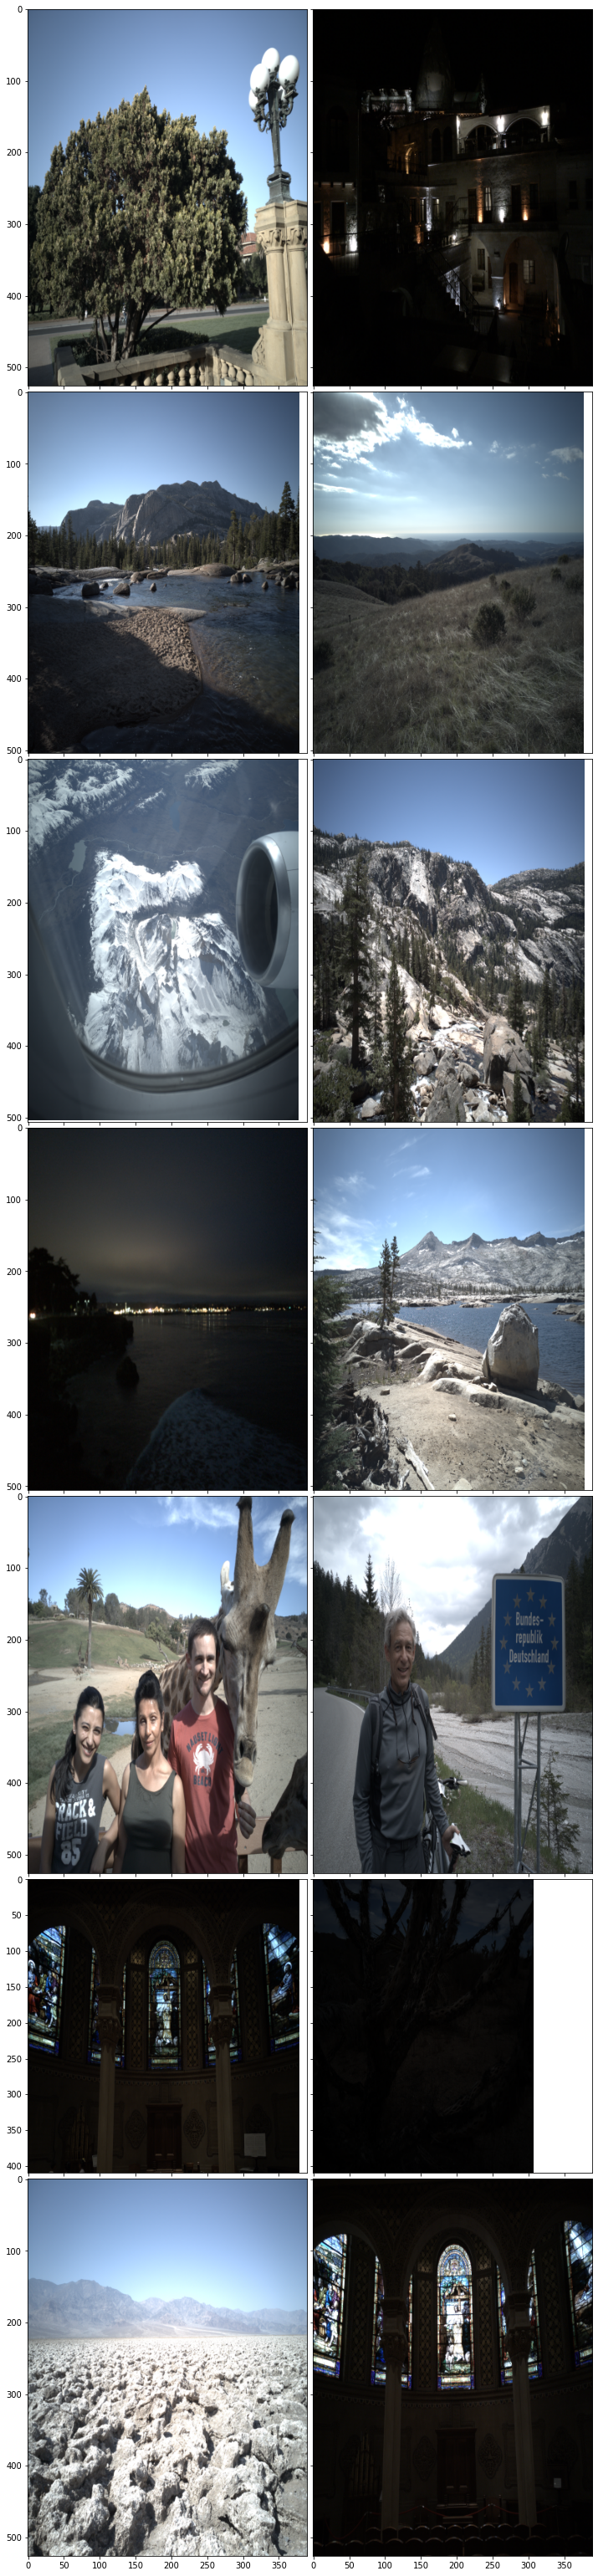

In [6]:
# using the data generator to get the proper images
from dhdrnet.gen_pairs import GenAllPairs
from more_itertools import one
from dhdrnet.vis_util import rgb_bgr_swap, show_image_grid

gen = GenAllPairs(
    raw_path=DATA_DIR/"dngs",
    out_path=DATA_DIR/"correct_exposures"/"exposures",
    store_path=None,
    compute_scores=False
)
sample_mid_exposures = [rgb_bgr_swap(one(gen.get_exposures(name, [0.0]))) for name in name_sample]
show_image_grid(sample_mid_exposures)

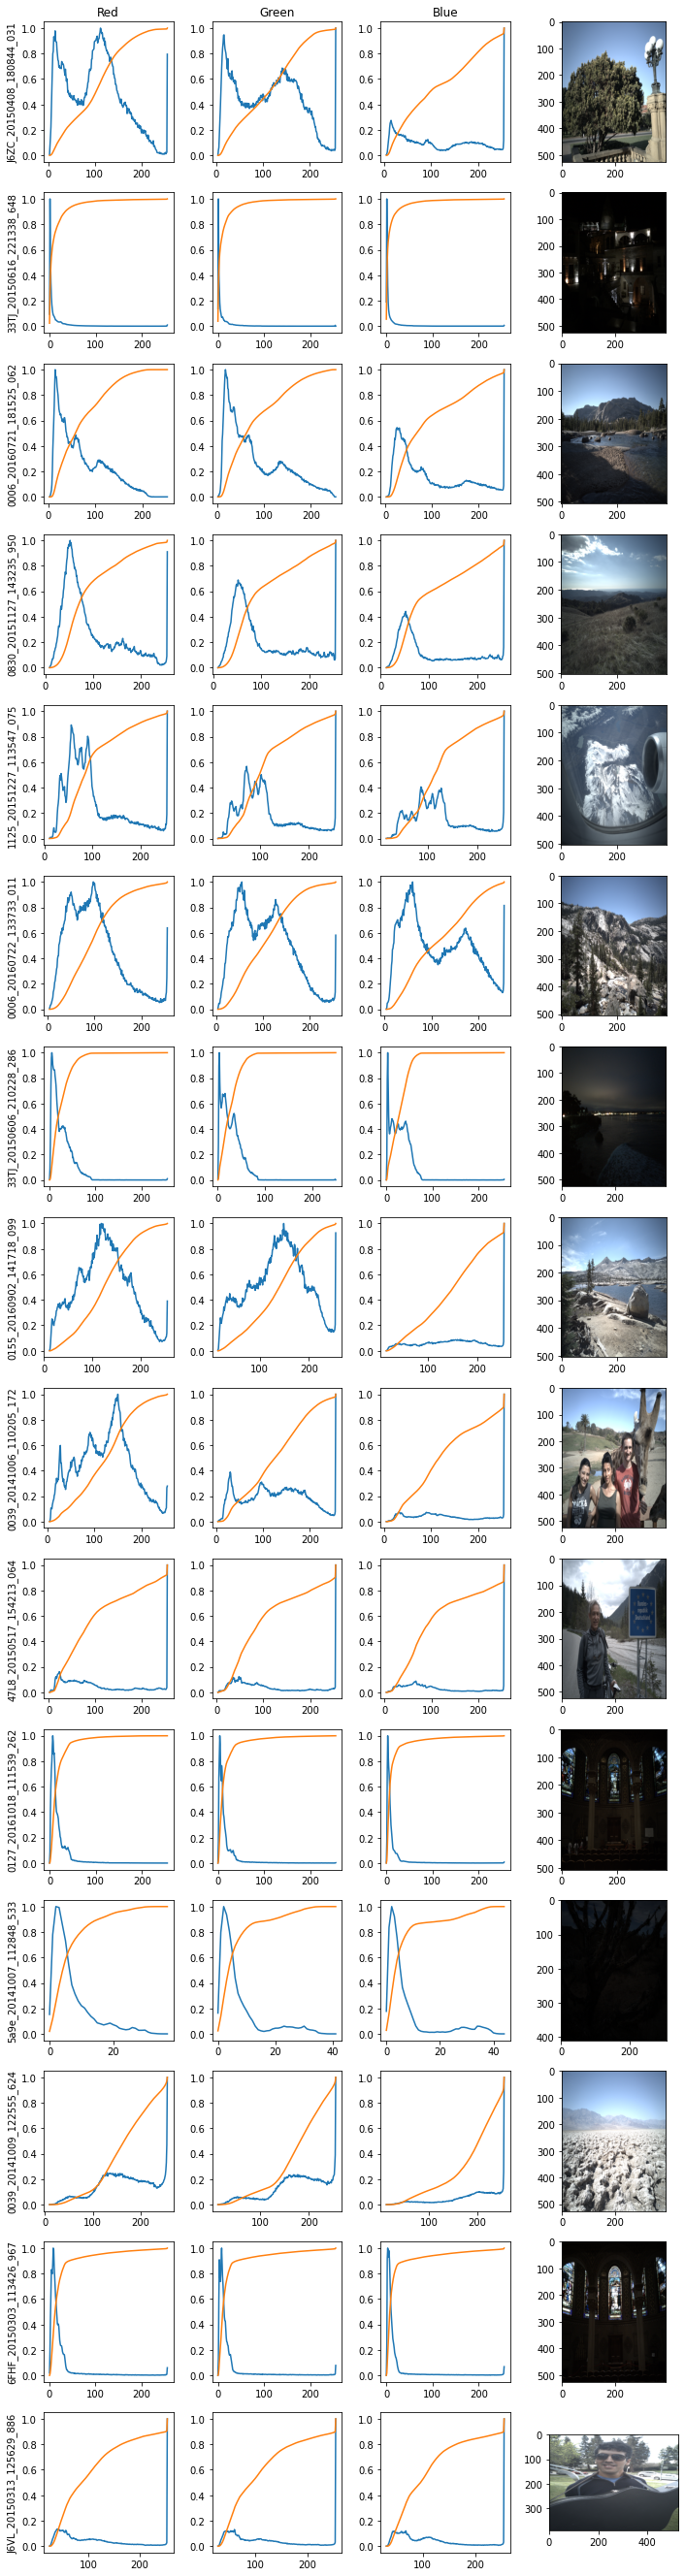

In [18]:
from skimage import exposure

ncols = 4
fig, axes = plt.subplots(
    nrows=sample_size,
    ncols=ncols,
    figsize=[int(2.5 * i) for i in (ncols, sample_size)],
)
for i, image in enumerate(sample_mid_exposures):
    for c, colour in enumerate(("red", "green", "blue", "src")):
        if colour == "src":
            axes[i, c].imshow(image)
            continue

        hist, bins = exposure.histogram(image[..., c], nbins=100)
        axes[i, c].plot(bins, hist / hist.max())
        image_cdf, bins = exposure.cumulative_distribution(image[..., c], nbins=100)
        axes[i, c].plot(bins, image_cdf)
        axes[i, 0].set_ylabel(name_sample[i])

axes[0, 0].set_title("Red")
axes[0, 1].set_title("Green")
axes[0, 2].set_title("Blue")

plt.tight_layout()
plt.show()


In [19]:
import pytorch_lightning as pl
from dhdrnet.histogram_model import HistogramNet

